In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from pingouin import kruskal
from pybedtools import BedTool

In [4]:
RootChomatin_bp_covered = '../../data/promoter_analysis/responsivepromotersRootOpenChrom.bp_covered.txt'
ShootChomatin_bp_covered = '../../data/promoter_analysis/responsivepromotersShootOpenChrom.bp_covered.txt'

In [87]:
def add_chr_linestart(input_location,output_location):
    """this function adds chr to the beginning of the line if it starts with a digit and saves a file"""
    output = open(output_location, 'w') #make output file with write capability
    #open input file
    with open(input_location, 'r') as infile:  
        #iterate over lines in file
        for line in infile:
            line = line.strip() # removes hidden characters/spaces
            if line[0].isdigit():
                                 
                line = 'chr' + line   #prepend chr to the beginning of line if starts with a digit
            output.write(line + '\n') #output to new file
    output.close()

In [5]:
def percent_coverage(bp_covered):
    """function to calculate the % coverage from the output file of bedtools coverage"""

    coverage_df = pd.read_table(bp_covered, sep='\t', header=None)
    col = ['chr','start','stop','gene','dot','strand','source', 'type', 'dot2', 'details', 'no._of_overlaps', 'no._of_bases_covered','promoter_length','fraction_bases_covered']
    coverage_df.columns = col
    #add % bases covered column
    coverage_df['percentage_bases_covered'] = coverage_df.fraction_bases_covered * 100

    #remove unnecessary columns
    coverage_df_reduced_columns = coverage_df[['chr','start','stop','gene','strand', 'no._of_overlaps', 'no._of_bases_covered','promoter_length','fraction_bases_covered','percentage_bases_covered']]
    return coverage_df_reduced_columns

In [9]:
root_coverage = percent_coverage(RootChomatin_bp_covered)

In [8]:
shoot_coverage = percent_coverage(ShootChomatin_bp_covered)

In [10]:
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [ ]:
#distribution plot

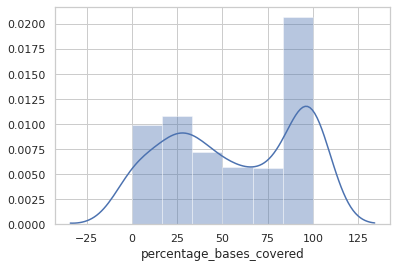

In [11]:
dist_plot = root_coverage['percentage_bases_covered']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

#save to file
#dist_plot_fig.savefig('../../data/plots/TFBS_coverage/all_genes_bp_covered_dist.pdf', format='pdf')


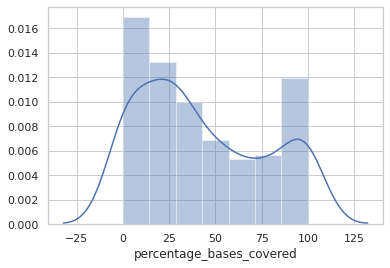

In [12]:
dist_plot = shoot_coverage['percentage_bases_covered']
#create figure with no transparency
dist_plot_fig = sns.distplot(dist_plot).get_figure()

#save to file
#dist_plot_fig.savefig('../../data/plots/TFBS_coverage/all_genes_bp_covered_dist.pdf', format='pdf')


## constitutive vs variable

In [27]:
def add_genetype(coverage):
    """function to add gene type to the df, and remove random genes"""
    select_genes_file = '../../data/genomes/ara_housekeeping_list.out'
    select_genes = pd.read_table(select_genes_file, sep='\t', header=None)
    cols = ['gene','gene_type']
    select_genes.columns = cols
    merged = pd.merge(coverage, select_genes, on='gene')
    
    merged_renamed = merged.copy()
    merged_renamed.gene_type.replace('housekeeping','constitutive', inplace=True)
    merged_renamed.gene_type.replace('highVar','variable', inplace=True)
    merged_renamed.gene_type.replace('randCont','random', inplace=True)
   
   # no_random = merged_renamed[merged_renamed.gene_type != 'random']
  #  no_random.reset_index(drop=True, inplace=True)
    
    return merged_renamed

In [40]:
roots_merged = add_genetype(root_coverage)
no_random_roots = roots_merged[roots_merged.gene_type != 'random']

In [41]:
shoots_merged = add_genetype(shoot_coverage)
no_random_shoots = shoots_merged[shoots_merged.gene_type != 'random']

In [80]:
#how many have open chromatin??
print('root openchromatin present:')
print(len(no_random_roots)-len(no_random_roots[no_random_roots.percentage_bases_covered == 0]))
print('shoot openchromatin present:')
print(len(no_random_shoots)-len(no_random_shoots[no_random_shoots.percentage_bases_covered == 0]))

root openchromatin present:
170
shoot openchromatin present:
156


In [84]:
#how many have open chromatin??
print('root openchromatin present variable promoters:')
print(len(no_random_roots[no_random_roots.gene_type=='variable'])-len(no_random_roots[no_random_roots.gene_type=='variable'][no_random_roots[no_random_roots.gene_type=='variable'].percentage_bases_covered == 0]))
print('root openchromatin present constitutive promoters:')
print(len(no_random_roots[no_random_roots.gene_type=='constitutive'])-len(no_random_roots[no_random_roots.gene_type=='constitutive'][no_random_roots[no_random_roots.gene_type=='constitutive'].percentage_bases_covered == 0]))


print('shoot openchromatin present variable promoters:')
print(len(no_random_shoots[no_random_shoots.gene_type=='variable'])-len(no_random_shoots[no_random_shoots.gene_type=='variable'][no_random_shoots[no_random_shoots.gene_type=='variable'].percentage_bases_covered == 0]))
print('shoot openchromatin present constitutive promoters:')
print(len(no_random_shoots[no_random_shoots.gene_type=='constitutive'])-len(no_random_shoots[no_random_shoots.gene_type=='constitutive'][no_random_shoots[no_random_shoots.gene_type=='constitutive'].percentage_bases_covered == 0]))

root openchromatin present variable promoters:
78
root openchromatin present constitutive promoters:
92
shoot openchromatin present variable promoters:
67
shoot openchromatin present constitutive promoters:
89


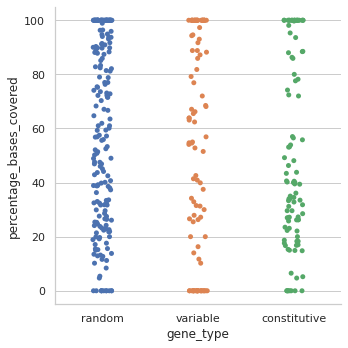

In [37]:
sns.catplot(x="gene_type", y="percentage_bases_covered", data=roots_merged) #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered.pdf', format='pdf')

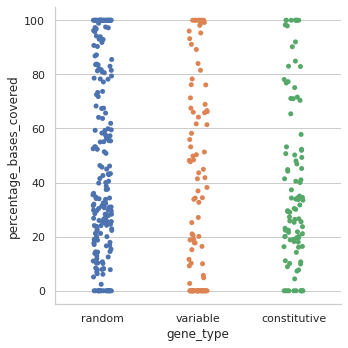

In [36]:
sns.catplot(x="gene_type", y="percentage_bases_covered", data=shoots_merged) #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered.pdf', format='pdf')

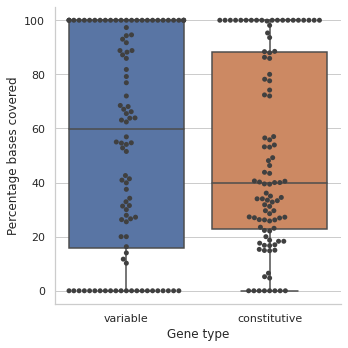

In [44]:
#roots
plot = sns.catplot(x="gene_type", y="percentage_bases_covered", kind='box', data=no_random_roots)
#plot points
ax = sns.swarmplot(x="gene_type", y="percentage_bases_covered", data=no_random_roots, color=".25")
plt.ylabel('Percentage bases covered')
plt.xlabel('Gene type');
#ax.get_figure() #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered_boxplot.pdf', format='pdf')

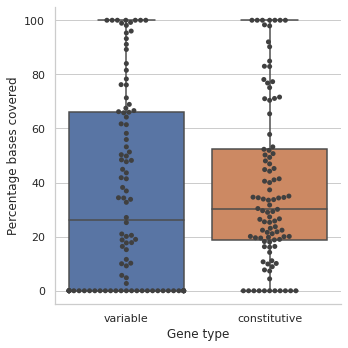

In [45]:
#shoots
plot = sns.catplot(x="gene_type", y="percentage_bases_covered", kind='box', data=no_random_shoots)
#plot points
ax = sns.swarmplot(x="gene_type", y="percentage_bases_covered", data=no_random_shoots, color=".25")
plt.ylabel('Percentage bases covered')
plt.xlabel('Gene type');
#ax.get_figure() #.savefig('../../data/plots/TFBS_coverage/responsive_bp_covered_boxplot.pdf', format='pdf')

In [51]:
#Get names of each promoter
def normality(input_proms):
    """function to test normality of data - returns test statistic, p-value"""
    #Get names of each promoter
    pd.Categorical(input_proms.gene_type)
    names = input_proms.gene_type.unique()
#     for name in names:
#         print(name)
       
    for name in names:
        print('{}: {}'.format(name, stats.shapiro(input_proms.percentage_bases_covered[input_proms.gene_type == name])))
    

In [56]:
def variance(input_proms):
    """function to test variance of data"""
#test variance
    constitutive = input_proms[input_proms.gene_type == 'constitutive']
    #reset indexes so residuals can be calculated later
    constitutive.reset_index(inplace=True)

    responsive = input_proms[input_proms.gene_type == 'variable']
    responsive.reset_index(inplace=True)

    control = input_proms[input_proms.gene_type == 'random']
    control.reset_index(inplace=True)

    print(stats.levene(constitutive.percentage_bases_covered, responsive.percentage_bases_covered))

In [53]:
normality(no_random_roots)

variable: (0.8477689027786255, 9.817533452860516e-09)
constitutive: (0.8819284439086914, 2.1920232029515319e-07)


In [54]:
normality(no_random_shoots)

variable: (0.85177081823349, 1.3794393183275133e-08)
constitutive: (0.9044100642204285, 2.2927988538867794e-06)


## Not normal

In [57]:
variance(no_random_roots)

LeveneResult(statistic=5.178417886571195, pvalue=0.023939722832682794)


In [58]:
variance(no_random_shoots)

LeveneResult(statistic=7.370297726965741, pvalue=0.007216645065514683)


## unequal variance for shoots

In [67]:
def kruskal_test(input_data):
    """function to do kruskal-wallis test on data""" 
   
    #print('\033[1m' +promoter + '\033[0m')
    print(kruskal(data=input_data, dv='percentage_bases_covered', between='gene_type'))
  #print('')

In [59]:
no_random_roots

,chr,start,stop,gene,strand,no._of_overlaps,no._of_bases_covered,promoter_length,fraction_bases_covered,percentage_bases_covered,gene_type
1,1,281760,282760,AT1G01780,+,1,769,1000,0.769,76.9,variable
2,1,316090,317090,AT1G01910,-,1,221,1000,0.221,22.1,constitutive
3,1,344515,345515,AT1G02000,+,1,1000,1000,1.000,100.0,variable
4,1,728829,729829,AT1G03070,+,2,550,1000,0.550,55.0,variable
6,1,864372,865372,AT1G03457,-,1,1000,1000,1.000,100.0,variable
...,...,...,...,...,...,...,...,...,...,...,...
390,5,22956628,22957628,AT5G56750,+,1,1000,1000,1.000,100.0,variable
396,5,24326827,24327827,AT5G60490,-,0,0,1000,0.000,0.0,variable
397,5,24669791,24670791,AT5G61360,+,1,315,1000,0.315,31.5,variable
400,5,25909014,25910014,AT5G64813,+,2,776,1000,0.776,77.6,constitutive


In [68]:
kruskal_test(no_random_roots)

            Source  ddof1         H     p-unc
Kruskal  gene_type      1  0.622938  0.429958


In [69]:
kruskal_test(no_random_shoots)

            Source  ddof1         H     p-unc
Kruskal  gene_type      1  1.679696  0.194965


## try gat enrichment

In [89]:
#add Chr to linestart of chromatin bed files

add_chr_linestart('../../data/ATAC-seq/potter2018/Shoots_NaOH_peaks_all.bed','../../data/ATAC-seq/potter2018/Shoots_NaOH_peaks_all_renamed.bed')
add_chr_linestart('../../data/ATAC-seq/potter2018/Roots_NaOH_peaks_all.bed','../../data/ATAC-seq/potter2018/Roots_NaOH_peaks_all_renamed.bed')